## 250810 Convergence

In [1]:
import pandas as pd
from sequenzo import *

In [2]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: 构建后缀树
# ------------------------

india_tree = build_suffix_tree(india_sequences)
us_tree = build_suffix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualConvergence(india_sequences)
us_model = IndividualConvergence(us_sequences)

In [3]:
india_suffix_counts = compute_suffix_count(india_tree, T)
india_merging_factors = compute_merging_factor(india_tree, T)
india_js_scores = compute_js_convergence(india_sequences, state_set=india_states)

us_suffix_counts = compute_suffix_count(us_tree, T)
us_merging_factors = compute_merging_factor(us_tree, T)
us_js_scores = compute_js_convergence(us_sequences, state_set=us_states)

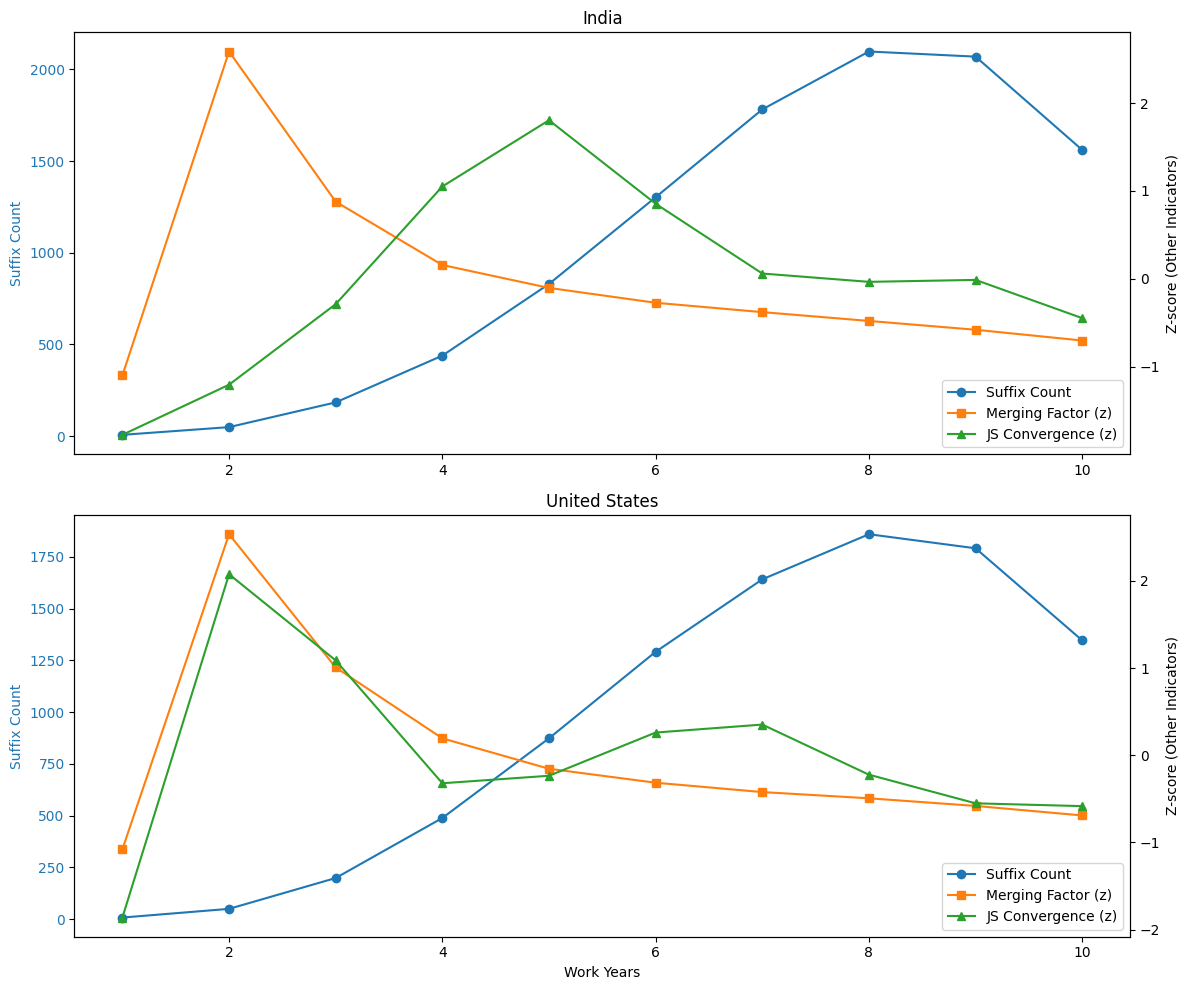

✅ 已生成带有自定义标题的对比图


<Figure size 640x480 with 0 Axes>

In [4]:
# 演示自定义子图标题功能
# 使用完全自定义的标题

# 准备两组数据
custom_groups_data = {
    "IND": {
        "suffix_counts": india_suffix_counts,
        "merging_factors": india_merging_factors,
        "js_convergence": india_js_scores
    },
    "USA": {
        "suffix_counts": us_suffix_counts,
        "merging_factors": us_merging_factors,
        "js_convergence": us_js_scores
    }
}

# 使用自定义子图标题
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # 这个仅用于默认标题格式，当有subplot_titles时会被覆盖
    subplot_titles=[
        "India", 
        "United States"
    ],  # 完全自定义的子图标题
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # 可以是年份、时期等
    x_label="Work Years",  # 自定义x轴标签
    legend_loc='lower right',  # 图例位置
    save_as="suffix_system_indicators_comparison"
)

print("✅ 已生成带有自定义标题的对比图")


In [5]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------

# 赋值回 dataframe
india_df["converged"] = india_model.compute_converged()
india_df["first_convergence_year"] = india_model.compute_first_convergence_year()
india_df["suffix_rarity_score"] = india_model.compute_suffix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["converged"] = us_model.compute_converged()
us_df["first_convergence_year"] = us_model.compute_first_convergence_year()
us_df["suffix_rarity_score"] = us_model.compute_suffix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# 合并回总数据
df = pd.concat([india_df, us_df], ignore_index=True)

计算每年 suffix rarity

如果某些年几乎所有人相同（方差接近 0），z 分数会是 NaN；这种情况下原始尺度的 rarity 更稳健。


In [6]:
# 返回 DataFrame，列名 t1..t10；zscore=True 则按年做列内标准化
df_rarity_india = india_model.compute_suffix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
df_rarity_us = us_model.compute_suffix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
# 若需要 z 分数版本：
# df_rarity_z = div.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=True)

df_rarity_india

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
1,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
2,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
3,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
4,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
...,...,...,...,...,...,...,...,...,...,...
15108,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
15109,9.623309,9.623309,9.623309,4.922830,4.887112,4.861137,2.057000,1.986558,1.887440,1.812552
15110,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
15111,2.559407,2.527417,2.460138,2.363491,2.243678,2.148538,2.057000,1.986558,1.887440,1.812552


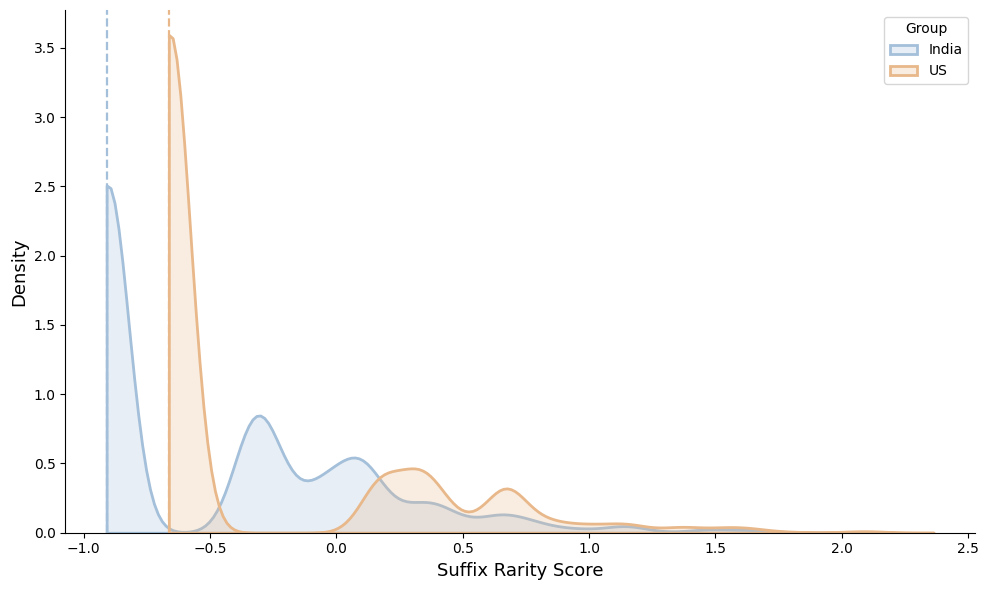

{'per_group': {'India': {'threshold_value': -0.9094414084560174,
   'k': 1057,
   'n': 15113,
   'prop_selected': 0.0699397869383974,
   'num_leq_threshold': 6277},
  'US': {'threshold_value': -0.6631875985692508,
   'k': 1665,
   'n': 23789,
   'prop_selected': 0.06999033166589601,
   'num_leq_threshold': 14851}},
 'threshold_method': 'topk'}

In [6]:
import numpy as np

# 1) 分组各自建模（组内做列向 z 标准化）
indiv_india = india_model
indiv_us    = us_model

india_stat = indiv_india.compute_standardized_rarity_score(min_t=3, window=1)
us_stat    = indiv_us.compute_standardized_rarity_score(min_t=3, window=1)

# 可自检：判定与统计量一致
flags_india = indiv_india.compute_converged(z_threshold=1.5, min_t=3, window=1)
flags_us    = indiv_us.compute_converged(z_threshold=1.5, min_t=3, window=1)
# 修正断言：收敛 = z <= -1.5 (低稀有度，更典型)
assert ((np.array(india_stat) <= -1.5) == np.array(flags_india)).all()
assert ((np.array(us_stat) <= -1.5) == np.array(flags_us)).all()

# 2) 画图：竖线就是决策边界
# 绘制分布图，竖线现在真正代表分类边界
plot_suffix_rarity_distribution(  # 不是 plot_prefix_
    data={"India": india_stat, "US": us_stat},
    threshold_method="top_proportion",  # 🔥 关键参数！
    proportion_p=0.07,
    save_as="convergence_standardized_rarity_comparison"
)



In [10]:
print("India mean/std/min:", np.mean(india_stat), np.std(india_stat, ddof=1), np.min(india_stat))
print("US mean/std/min:",    np.mean(us_stat),    np.std(us_stat, ddof=1),    np.min(us_stat))


India mean/std/min: -0.44342733371343857 0.5577054675599352 -0.9094414084560174
US mean/std/min: -0.3139239048440329 0.5849568648230404 -0.6631875985692508


In [ ]:
# 🆕 新接口 - 最简单（推荐日常使用）
plot_suffix_rarity_distribution(
    data={"India": scores1, "US": scores2},
    proportion_p=0.03  # 只需要这一个参数！
)

# 📊 要用分位数方法
plot_suffix_rarity_distribution(
    data={"India": scores1, "US": scores2},
    threshold_method="quantile",
    quantile_p=0.05  # Legacy参数依然有效
)

# 🔬 要用z-score方法（标准化数据）
plot_suffix_rarity_distribution(
    data={"India": std_scores1, "US": std_scores2},
    threshold_method="zscore",
    is_standardized_score=True,  # Legacy参数
    z_threshold=1.5             # Legacy参数 - 依然需要！
)

Path Uniqueness 箱线图 + Strip（展示极端个体）

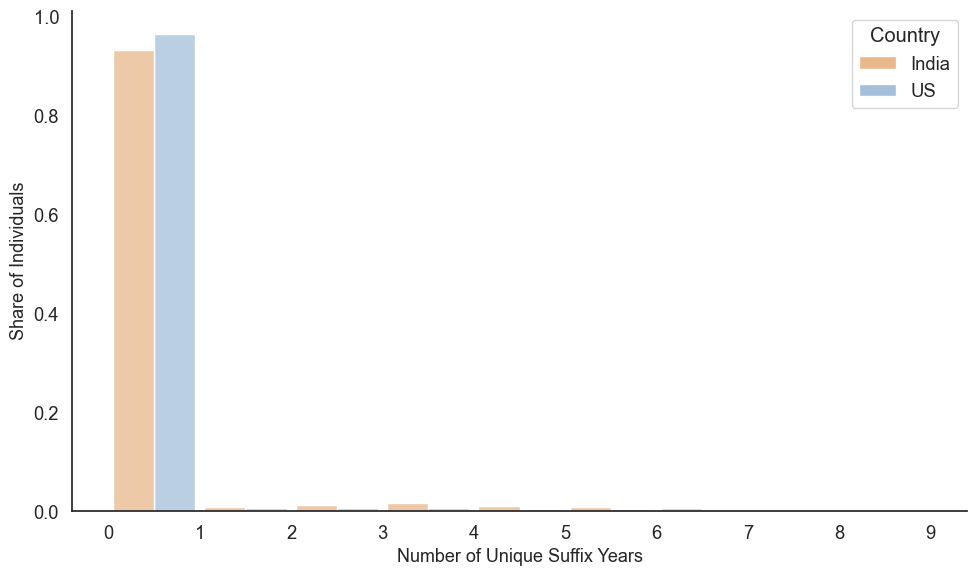

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格与字体比例（和前图一致）
sns.set(style="white", font_scale=1.2)

# 设置颜色（莫奈柔色调）
india_color = "#E8B88A"
us_color = "#A3BFD9"
palette = {"India": india_color, "US": us_color}

# 确保国家字段是大写标签（与图例一致）
df["country"] = df["country"].str.strip().str.title().replace({"Us": "US", "India": "India"})

# 创建画布
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=df,
    x="path_uniqueness",
    hue="country",
    multiple="dodge",
    binwidth=1,
    shrink=0.9,
    palette=palette,
    stat="probability",    # 👈 显示 share 而不是 density
    common_norm=False,     # 👈 每组单独归一化
    ax=ax
)

# 手动修复 legend
from matplotlib.patches import Patch

custom_legend = [
    Patch(facecolor="#E8B88A", label="India"),
    Patch(facecolor="#A3BFD9", label="US")
]
ax.legend(handles=custom_legend, title="Country")

# 设置标签与样式
ax.set_xlabel("Number of Unique Suffix Years", fontsize=13)
ax.set_ylabel("Share of Individuals", fontsize=13)
# ax.set_title("Distribution of Path Uniqueness by Country", fontsize=15)
ax.set_xticks(range(0, df["path_uniqueness"].max() + 1))
# plt.legend(title="Country")
sns.despine()
plt.tight_layout()

# 保存 & 显示
plt.savefig("Suffix Path Uniqueness Distribution by Country", dpi=300, bbox_inches='tight')
plt.show()


In [9]:
for country in ['India', 'US']:
    
    country_df = df[df['country']==country]
    
    print(f'{country} - full sample size, {country_df.shape[0]}')
    
    print(country)

    print(country_df['converged'].value_counts())

India - full sample size, 15113
India
converged
0    15113
Name: count, dtype: int64
US - full sample size, 23789
US
converged
0    23789
Name: count, dtype: int64
